In [1]:
import pandas as pd
import numpy as np
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
from scipy import stats
# from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.shape

(205, 26)

In [6]:
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
data.drop('car_ID',axis=1,inplace=True)

In [9]:
def target(data:pd.DataFrame,y:pd.Series):
    
    tar_en=TargetEncoder()
    tar=tar_en.fit_transform(data,y)
    return tar

In [10]:
def ohe(data:pd.DataFrame):
    cat_ohe=pd.get_dummies(data,drop_first=True)
    return cat_ohe

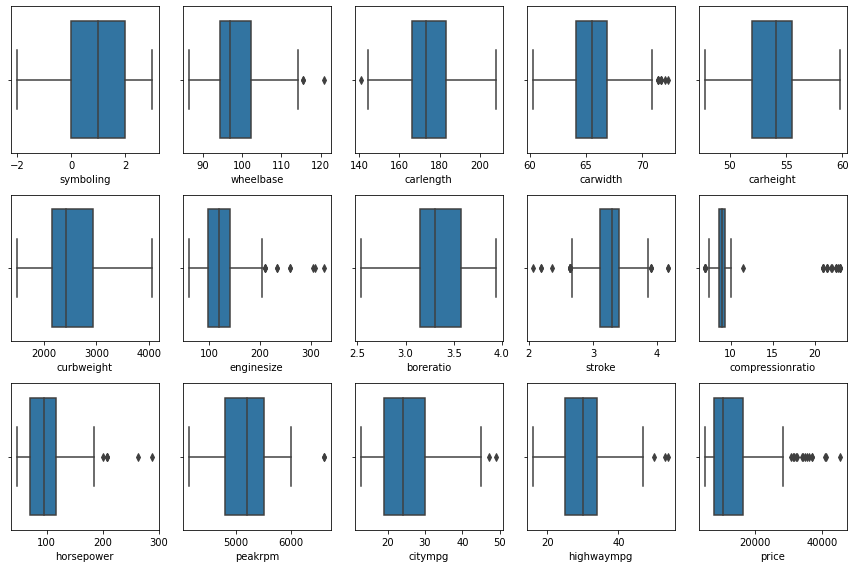

In [11]:
col=0
fig,ax=plt.subplots(3,5,figsize=(12,8))
int_col=data.select_dtypes(exclude='object')
for i in int_col.columns.tolist():
    sns.boxplot(data=int_col,x=i,ax=ax.flat[col])
    col+=1
plt.tight_layout()    # this we can see lot of outlier in this data soo we need to remove the outlier 

In [12]:
def removeOutliers(data: pd.DataFrame)->pd.DataFrame:
    
        iqr = data.apply(lambda x: stats.iqr(x))
        q3 = data.apply(lambda x: x.quantile(0.75))
        q1 = data.apply(lambda x: x.quantile(0.25))
        ul = q3 + 1.5 * iqr
        ll = q1 - 1.5 * iqr

        new_data = data.apply(lambda x: [x.median() if (i > ul[x.name]) or (i < ll[x.name]) else i for i in x])

        new_data1 = new_data.drop(new_data.sum()[new_data.sum() == 0].index, axis = 1)
        new_data_std = (new_data1 - new_data1.mean())/new_data1.std()
        return new_data_std

In [13]:
def preProcessing(data):
    num_data = data.select_dtypes(include = ['float', 'int'])
    cat_data = data.select_dtypes(include = 'object')
    idx_no=data.index
    tar_y=y[idx_no]
    tar_col=data['CarName']
    target_encod=target(tar_col,tar_y)
    
    cat_data_ohe=cat_data.drop('CarName',axis=1)
    num_data_transformed = removeOutliers(num_data)
    
    cat_data_transformed = ohe(cat_data_ohe)
    
    new_data = pd.concat([num_data_transformed,cat_data_transformed,target_encod], axis = 1)
    #print(target_encod)
    return new_data

<AxesSubplot: xlabel='price', ylabel='Density'>

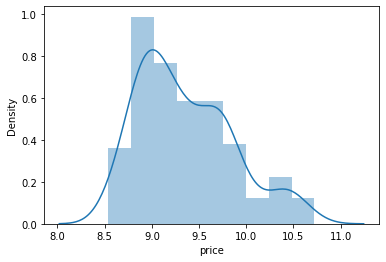

In [14]:
X=data.drop('price',axis=1)
y=data['price']
y=np.log1p(y)
sns.distplot(y)

In [15]:
trans=preProcessing(X)
trans

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarName
0,1.739213,-1.769706,-0.446071,-0.871211,-2.015483,-0.014531,0.341122,0.517804,-3.059144,0.133853,...,0,0,0,0,0,0,1,0,0,9.374991
1,1.739213,-1.769706,-0.446071,-0.871211,-2.015483,-0.014531,0.341122,0.517804,-3.059144,0.133853,...,0,0,0,0,0,0,1,0,0,9.401147
2,0.133183,-0.710597,-0.248032,-0.092278,-0.542200,0.513625,1.116948,-2.399008,0.876888,0.133853,...,0,0,0,0,0,0,1,0,0,9.401147
3,0.936198,0.240806,0.197556,0.297189,0.235366,-0.419770,-0.399438,-0.516003,0.528126,2.042045,...,0,0,0,0,0,0,1,0,0,9.379305
4,0.936198,0.169002,0.197556,0.408465,0.235366,0.515545,0.552711,-0.516003,0.528126,-1.774340,...,0,0,0,0,0,0,1,0,0,9.414321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.472847,1.910249,1.204255,1.799417,0.726460,0.761377,0.729035,1.662375,-0.717454,1.087949,...,0,0,0,0,0,0,1,0,0,9.389563
201,-1.472847,1.910249,1.204255,1.743779,0.726460,0.947672,0.729035,1.662375,-0.717454,-0.438605,...,0,0,0,0,0,0,1,0,0,9.400825
202,-1.472847,1.910249,1.204255,1.799417,0.726460,0.876611,1.857509,0.923942,-2.112503,-0.247786,...,0,0,0,0,0,0,1,0,0,9.421806
203,-1.472847,1.910249,1.204255,1.799417,0.726460,1.270327,0.870094,-1.180593,0.528126,0.133853,...,0,0,0,0,1,0,0,0,0,9.441325


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(trans,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [18]:
y_pred=reg.fit(X_train,y_train).predict(X_test)

In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9310539775291703

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,trans,y,cv=10) # thus the observation is less u can see that the cv_score varies from 66% to 91%

array([0.8527403 , 0.74699621, 0.88567335, 0.9249536 , 0.72413507,
       0.90996299, 0.91207934, 0.59728981, 0.66462859, 0.82246441])